<a href="https://colab.research.google.com/github/graham-roper/Research-Project/blob/master/BasicImageClassifierUsingCIPHER10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#this program classifies images

In [0]:
#load the data
from keras.datasets import cifar10
(x_train,y_train), (x_test,y_test) = cifar10.load_data()

In [6]:
#print the data types
print(type(x_train))
print(type(y_train))
print(type(x_test))
print(type(y_test))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [7]:
#get the shapes
print('x_train shape', x_train.shape)
print('y_train shape', y_train.shape)
print('x_test shape', x_test.shape)
print('y_test shape', y_test.shape)

x_train shape (50000, 32, 32, 3)
y_train shape (50000, 1)
x_test shape (10000, 32, 32, 3)
y_test shape (10000, 1)


In [9]:
#take a look at the first image (at index=0) in the training data set
x_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

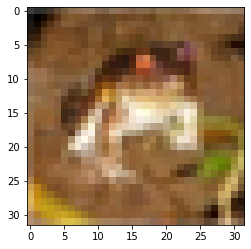

In [11]:
#show image as picture
import matplotlib.pyplot as plt
img = plt.imshow(x_train[0])

In [12]:
#print the label of the image
print('the label is: ', y_train[0])

the label is:  [6]


In [15]:
#one-hot encoding: convert the labels into a set of 10 number to import into the neural network
from keras.utils import to_categorical
y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)

#print the new labels in the training data set
print(y_train_one_hot)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]]


In [16]:
#print an example of the new labels
print('the one hot label is: ', y_train_one_hot[0])

the one hot label is:  [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


In [0]:
#Normalize the pixels in the images to be values between 0 and 1
x_train = x_train/255
x_test = x_test/255


In [0]:
#build the CNN
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D

#create the architecture
model = Sequential()

#Convolution layer
model.add( Conv2D(32, (5,5), activation='relu', input_shape=(32,32,3)))

#MaxPooling Layer
model.add(MaxPooling2D(pool_size=(2,2)))

#Convolution layer2
model.add( Conv2D(32, (5,5), activation='relu'))

#MaxPooling Layer2
model.add(MaxPooling2D(pool_size=(2,2)))

#Flatten Layer
model.add(Flatten())

model.add(Dense(1000, activation='relu'))
model.add(Dense(10, activation='softmax'))


In [0]:
#Compile the model
model.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [25]:
#train the model
hist = model.fit(x_train, y_train_one_hot, batch_size=256, epochs=10, validation_split=0.3)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 35000 samples, validate on 15000 samples
Epoch 1/10





35000/35000 [==============================] - 54s 2ms/step - loss: 1.6974 - acc: 0.3812 - val_loss: 1.5163 - val_acc: 0.4612
Epoch 2/10
35000/35000 [==============================] - 53s 2ms/step - loss: 1.3823 - acc: 0.5032 - val_loss: 1.3204 - val_acc: 0.5287
Epoch 3/10
35000/35000 [==============================] - 52s 1ms/step - loss: 1.2360 - acc: 0.5592 - val_loss: 1.2129 - val_acc: 0.5704
Epoch 4/10
35000/35000 [==============================] - 53s 2ms/step - loss: 1.1215 - acc: 0.6029 - val_loss: 1.1499 - val_acc: 0.5943
Epoch 5/10
35000/35000 [==============================] - 53s 2ms/step - loss: 1.0345 - acc: 0.6367 - val_loss: 1.0866 - val_acc: 0.6197
Epoch 6/10
35000/35000 [==============================] - 52s 1ms/step - loss: 0.9454 - acc: 0.6689 - val_loss: 1.0810 - val_acc: 0.6234
Epoch 7/10
35000/35000 [==

In [26]:
#get the models accuracy
model.evaluate(x_test, y_test_one_hot)[1]

10000/10000 [==============================] - 5s 470us/step


0.6765

<function matplotlib.pyplot.show>

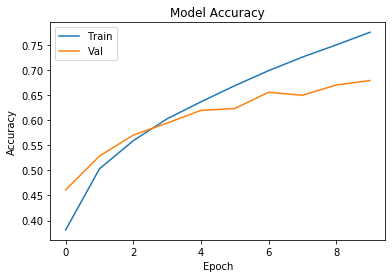

In [28]:
#visualize the models accuracy
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

<function matplotlib.pyplot.show>

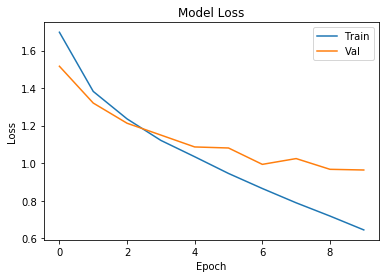

In [30]:
#visualize the models loss
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

In [32]:
#Load the data
from google.colab import files
uploaded = files.upload()
my_image = plt.imread('cat.4014.jpg')

Saving cat.4014.jpg to cat.4014.jpg


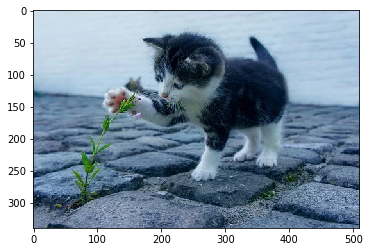

In [33]:
#show the image
img = plt.imshow(my_image)

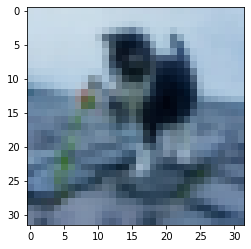

In [34]:
#resize the image
from skimage.transform import resize
my_image_resized = resize(my_image, (32,32,3))
img = plt.imshow(my_image_resized)

In [35]:
#get the probabilities for each class
import numpy as np
probabilities = model.predict(np.array([my_image_resized, ]))

#print the probabilities
probabilities

array([[8.9182872e-01, 1.8303180e-02, 4.3847453e-02, 1.3384135e-02,
        7.8330478e-03, 4.7566257e-03, 4.8768290e-04, 1.7663750e-03,
        5.9994659e-04, 1.7192783e-02]], dtype=float32)

In [38]:
number_to_class = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
index = np.argsort(probabilities[0,:])
print('most likely class: ', number_to_class[index[9]], '--probability', probabilities[0, index[9]])
print('2nd most likely class: ', number_to_class[index[8]], '--probability', probabilities[0, index[8]])
print('3rd most likely class: ', number_to_class[index[7]], '--probability', probabilities[0, index[7]])
print('4th most likely class: ', number_to_class[index[6]], '--probability', probabilities[0, index[6]])
print('5th most likely class: ', number_to_class[index[5]], '--probability', probabilities[0, index[5]])


most likely class:  airplane --probability 0.8918287
2nd most likely class:  bird --probability 0.043847453
3rd most likely class:  automobile --probability 0.01830318
4th most likely class:  truck --probability 0.017192783
5th most likely class:  cat --probability 0.013384135


In [0]:
#save the model
model.save('my_model.h5')

In [0]:
#load the model
from keras.models import load_model
model = load_model('my_model.h5')